In [47]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import glob
import os
import re
from shutil import copyfile
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
import pyrosetta as py
py.init()

PyRosetta-4 2021 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python37.Release 2021.07+release.c48be2695c4ba637c6fa19ee5d289fd9a8aa99ef 2021-02-21T11:50:06] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: {0} Checking for fconfig files in pwd and ./rosetta/flags
core.init: {0} Rosetta version: PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python37.Release r275 2021.07+release.c48be26 c48be2695c4ba637c6fa19ee5d289fd9a8aa99ef http://www.pyrosetta.org 2021-02-21T11:50:06
core.init: {0} command: PyRosetta -ex1 -ex2aro -database /software/conda/envs/pyrosetta/lib/python3.7/site-packages/pyrosetta/database
basic.random.init_random_generator: {0} 'RNG device' seed mode, using '/dev/urandom', seed=-1367851671 seed_offset=0 real_seed=-1367851671 thread_index=0
basic.random.init_random_generator: {0} RandomGenerator:init: Normal mode, seed=-1367851671 RG_type=m

In [2]:
df = pd.read_pickle('../picked_networks.pickle')
df.shape

(2742, 4)

In [3]:
print(df)

                                      tyrs  n_res_network  n_hbonds  \
description                                                           
0_input_0042_0002_6_0008_0005_0003     1.0            6.0       7.0   
0_input_0042_0002_6_0008_0005_0005     1.0           10.0      11.0   
0_input_0042_0002_6_0008_0005_0006     1.0            4.0       4.0   
0_input_0042_0002_9_0009_0004_0003     1.0            6.0       6.0   
0_input_0042_0002_9_0009_0004_0005     2.0           19.0      21.0   
0_input_0042_0002_9_0009_0004_0008     1.0            6.0       6.0   
0_input_0093_0003_10_0001_0004         2.0           17.0      18.0   
0_input_0093_0003_10_0001_0004_0007    2.0           19.0      22.0   
0_input_0093_0003_10_0002_0007_0003    1.0            9.0      10.0   
0_input_0093_0003_10_0002_0007_0005    1.0           10.0      12.0   
0_input_0093_0003_10_0003_0010_0003    1.0           10.0      13.0   
0_input_0093_0003_10_0003_0010_0004    1.0           14.0      15.0   
0_inpu

In [4]:
print(glob.glob('*_input_*/score.sc'))

['24_input_0089_0005_10_0001_0004_0004/score.sc', '109_input_0045_0002_9_0009_0009_0006/score.sc', '24_input_0089_0005_10_0001_0004_0002/score.sc', '0_input_0093_0005_7_0007_0006_0002/score.sc', '109_input_0045_0002_7_0010_0002_0005/score.sc', '109_input_0045_0002_6_0004_0004_0002/score.sc', '23_input_0070_0004_8_0001_0008_0006/score.sc', '0_input_0093_0003_10_0010_0007_0007/score.sc', '16_input_0002_0002_7_0009_0006_0002/score.sc', '0_input_0093_0005_10_0004_0007_0010/score.sc', '0_input_0093_0003_14_0003_0002_0010/score.sc', '108_input_0007_0003_5_0001_0008_0004/score.sc', '0_input_0093_0003_19_0008_0010_0003/score.sc', '109_input_0090_0005_7_0001_0003_0001/score.sc', '16_input_0021_0001_19_0008_0001_0005/score.sc', '0_input_0093_0005_12_0006_0004_0005/score.sc', '0_input_0093_0003_8_0010_0010_0010/score.sc', '0_input_0093_0003_11_0003_0007_0003/score.sc', '109_input_0045_0002_6_0007_0009_0002/score.sc', '25_input_0002_0001_14_0001_0008_0010/score.sc', '0_input_0093_0005_7_0005_0001_

In [5]:
dall_scores = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('*_input_*/score.sc')], ignore_index = True)
print(dall_scores)

       SCORE:  total_score  angle_constraint  atom_pair_constraint  \
0      SCORE:    -1175.865               0.0                   0.0   
1      SCORE:    -1177.137               0.0                   0.0   
2      SCORE:    -1177.965               0.0                   0.0   
3      SCORE:    -1182.240               0.0                   0.0   
4      SCORE:    -1182.349               0.0                   0.0   
5      SCORE:    -1171.873               0.0                   0.0   
6      SCORE:    -1179.409               0.0                   0.0   
7      SCORE:    -1174.466               0.0                   0.0   
8      SCORE:    -1174.096               0.0                   0.0   
9      SCORE:    -1175.042               0.0                   0.0   
10     SCORE:    -1204.571               0.0                   0.0   
11     SCORE:    -1202.812               0.0                   0.0   
12     SCORE:    -1205.938               0.0                   0.0   
13     SCORE:    -12

In [6]:
dscore_per_design = pd.DataFrame()
dscore_per_design = dscore_per_design.append([pd.read_csv(f, sep='\s+', header=1).mean() for f in glob.glob('*_input_*/score.sc')], ignore_index = True)


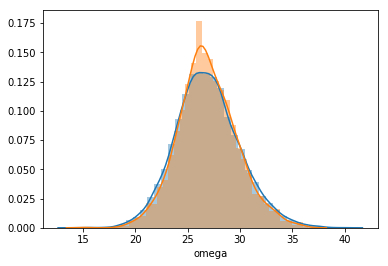

In [7]:
sns.distplot(dall_scores["omega"], bins=40)
sns.distplot(dscore_per_design["omega"], bins=40)

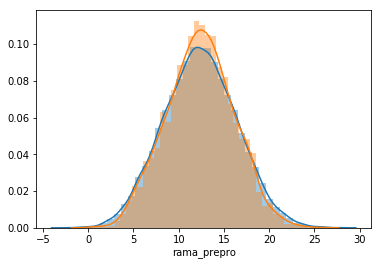

In [8]:
sns.distplot(dall_scores["rama_prepro"], bins=40)
sns.distplot(dscore_per_design["rama_prepro"], bins=40)

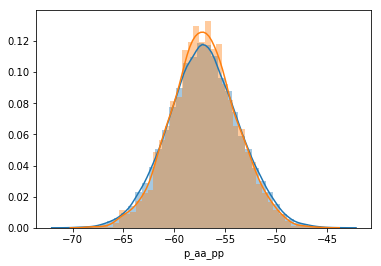

In [9]:
sns.distplot(dall_scores["p_aa_pp"], bins=40)
sns.distplot(dscore_per_design["p_aa_pp"], bins=40)

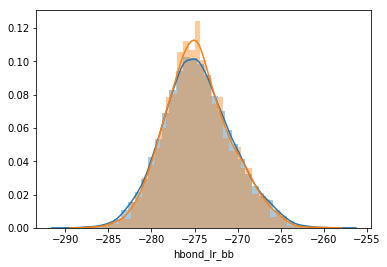

In [10]:
sns.distplot(dall_scores["hbond_lr_bb"], bins=40)
sns.distplot(dscore_per_design["hbond_lr_bb"], bins=40)

In [11]:
hbond_dict = {}
for index,row in df.iterrows():
    hbonds = []
#    my_regex = r"\# " + index + r"_0001_native_network_[1-9].cst\n\# \n"
#    cst = re.split(my_regex,row["network_cst"])
    cst = row["network_cst"]
    lines = cst.split('\n')
    for line in lines:      
        if line != "" and "AtomPair " in line:
            tyr_10 = False
            tyr_96 = False          
            acc_res = int(line.split()[2])
            don_res = int(line.split()[4])
            acc_atm = line.split()[1]
            don_atm = line.split()[3]
            if " OH  10 " in line:
                tyr_10 = True
            if " OH  96 " in line:
                tyr_96 = True           
            if acc_atm not in ["CB","N","CA","O"] and don_atm not in ["CB","N","CA","O"]:
                hbonds.append((acc_res,don_res,acc_atm,don_atm,tyr_10,tyr_96))
    hbond_dict[index] = hbonds
print(hbond_dict)

{'109_input_0082_0004_7_0010_0010_0004': [(54, 52, 'OE1', 'NH1', False, False), (54, 52, 'OE1', 'NH2', False, False), (68, 52, 'OE2', 'NE', False, False), (54, 56, 'OE2', 'NE', False, False), (54, 56, 'OE2', 'NH2', False, False), (68, 66, 'OE1', 'NH1', False, False), (98, 66, 'OE2', 'NH2', False, False), (98, 82, 'OE2', 'OG', False, False), (130, 96, 'OE1', 'OH', False, True), (98, 114, 'OE1', 'NZ', False, False), (130, 114, 'OE1', 'NZ', False, False)], '109_input_0082_0004_7_0010_0010_0003': [(12, 156, 'OE2', 'NE1', False, False), (12, 158, 'OE2', 'NE', False, False), (12, 158, 'OE1', 'NH2', False, False), (82, 114, 'OE1', 'NH1', False, False), (82, 114, 'OE2', 'NH2', False, False), (130, 96, 'OE1', 'OH', False, True), (130, 114, 'OE1', 'NE', False, False), (130, 142, 'OE2', 'NE2', False, False), (142, 158, 'OE1', 'NH1', False, False)], '109_input_0082_0004_7_0010_0010_0001': [(82, 114, 'OE1', 'NH1', False, False), (82, 114, 'OE2', 'NH2', False, False), (130, 96, 'OE1', 'OH', False, T

In [ ]:
hbond_set = py.rosetta.core.scoring.hbonds.HBondSet()
dretained = pd.DataFrame(columns=['%_retained','%_retained_tyr'])

for index,row in df.iterrows():
    interactions = hbond_dict[row["description"]]
    interact_res = Counter([inter[0:2] for inter in interactions])
    interact_res_tyr = Counter([inter[0:2] for inter in interactions if True in inter])
    num_interactions = float(len(list(interact_res.elements())))
    num_interactions_tyr = float(len(list(interact_res_tyr.elements())))
    curr_retention = []
    curr_retention_tyr = []
    for pdb in glob.glob(row["description"] + "/" + row["description"] + "_*.pdb"):
        current_inter_list = []
        pose = py.pose_from_pdb(pdb)
        pose.update_residue_neighbors()
        py.rosetta.core.scoring.hbonds.fill_hbond_set(pose, False, hbond_set)
        for i in range(1, hbond_set.nhbonds()+1):
            if hbond_set.hbond(i).acc_atm_is_backbone() == False and hbond_set.hbond(i).don_hatm_is_backbone() == False:
                current_inter_list.append((hbond_set.hbond(i).acc_res(),hbond_set.hbond(i).don_res()))
        current_inter = Counter(current_inter_list)
        num_curr_inter = 0.0
        num_curr_inter_tyr = 0.0
        for inter in current_inter:
            if inter in interact_res:
                if current_inter[inter] >= interact_res[inter]:
                    num_curr_inter += interact_res[inter]
                elif current_inter[inter] < interact_res[inter]:
                    num_curr_inter += current_inter[inter]
                    
            if inter in interact_res_tyr:
                if current_inter[inter] >= interact_res_tyr[inter]:
                    num_curr_inter_tyr += interact_res_tyr[inter]
                elif current_inter[inter] < interact_res_tyr[inter]:
                    num_curr_inter_tyr += current_inter[inter]
        curr_retention.append(num_curr_inter/num_interactions)
        curr_retention_tyr.append(num_curr_inter_tyr/num_interactions_tyr)
    dretained.loc[index] = [sum(curr_retention)/len(curr_retention), sum(curr_retention_tyr)/len(curr_retention_tyr)]
print(dretained)
        
        
#                        print(pose.residue(hbond_set.hbond(i).don_res()).atom_name(pose.residue(hbond_set.hbond(i).don_res()).first_adjacent_heavy_atom(hbond_set.hbond(i).don_hatm())))
                

In [8]:
dretained.to_pickle('networks_hbond_retention.pickle')

In [13]:
dretained = pd.read_csv('networks_hbond_retention.csv', header=0, index_col=0)

In [14]:
print(dretained)

                                      %_retained  %_retained_tyr
0_input_0042_0002_6_0008_0005_0003      0.461459        0.952038
0_input_0042_0002_6_0008_0005_0005      0.568915        0.950372
0_input_0042_0002_6_0008_0005_0006      0.223270        0.446541
0_input_0042_0002_9_0009_0004_0003      0.305800        0.373348
0_input_0042_0002_9_0009_0004_0005      0.550312        0.544495
0_input_0042_0002_9_0009_0004_0008      0.222091        0.286557
0_input_0093_0003_10_0001_0004          0.462426        0.689614
0_input_0093_0003_10_0001_0004_0007     0.481673        0.693613
0_input_0093_0003_10_0002_0007_0003     0.506982        0.983607
0_input_0093_0003_10_0002_0007_0005     0.549900        0.968215
0_input_0093_0003_10_0003_0010_0003     0.277713        0.552870
0_input_0093_0003_10_0003_0010_0004     0.499480        0.979955
0_input_0093_0003_10_0003_0010_0005     0.389292        0.582615
0_input_0093_0003_10_0003_0010_0007     0.261345        0.435644
0_input_0093_0003_10_0003

In [15]:
dnetworks = pd.concat([dretained, df], axis=1)
print(dnetworks)

                                      %_retained  %_retained_tyr  tyrs  \
description                                                              
0_input_0042_0002_6_0008_0005_0003      0.461459        0.952038   1.0   
0_input_0042_0002_6_0008_0005_0005      0.568915        0.950372   1.0   
0_input_0042_0002_6_0008_0005_0006      0.223270        0.446541   1.0   
0_input_0042_0002_9_0009_0004_0003      0.305800        0.373348   1.0   
0_input_0042_0002_9_0009_0004_0005      0.550312        0.544495   2.0   
0_input_0042_0002_9_0009_0004_0008      0.222091        0.286557   1.0   
0_input_0093_0003_10_0001_0004          0.462426        0.689614   2.0   
0_input_0093_0003_10_0001_0004_0007     0.481673        0.693613   2.0   
0_input_0093_0003_10_0002_0007_0003     0.506982        0.983607   1.0   
0_input_0093_0003_10_0002_0007_0005     0.549900        0.968215   1.0   
0_input_0093_0003_10_0003_0010_0003     0.277713        0.552870   1.0   
0_input_0093_0003_10_0003_0010_0004   

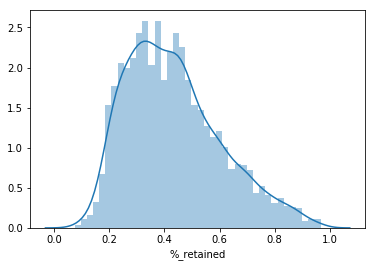

In [16]:
sns.distplot(dnetworks["%_retained"], bins=40)

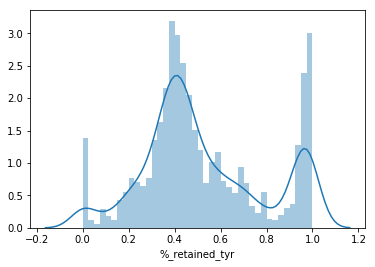

In [17]:
sns.distplot(dretained["%_retained_tyr"], bins=40)

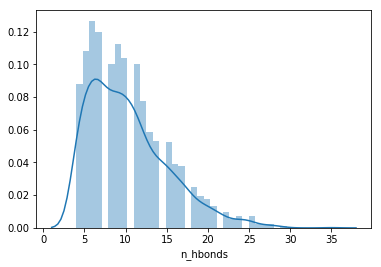

In [18]:
sns.distplot(dnetworks["n_hbonds"], bins=40)

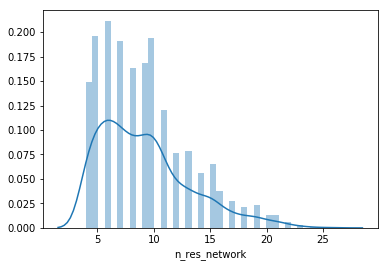

In [19]:
sns.distplot(dnetworks["n_res_network"], bins=40)

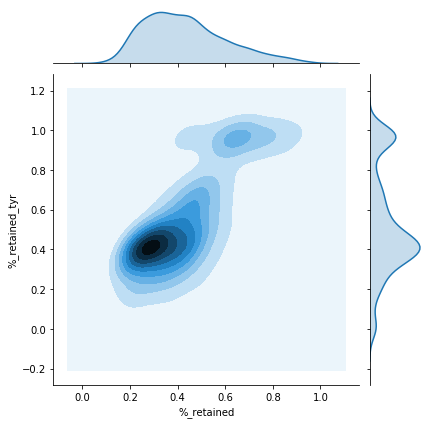

In [20]:
sns.jointplot("%_retained", "%_retained_tyr", dnetworks, kind='kde')

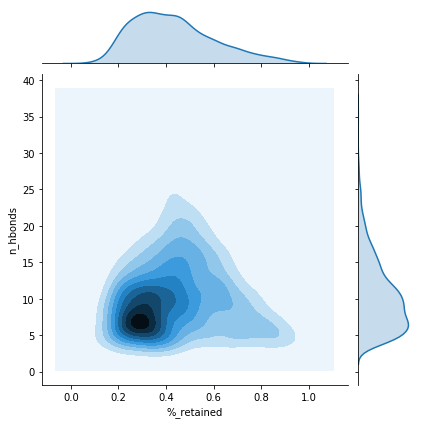

In [21]:
sns.jointplot("%_retained", "n_hbonds", dnetworks, kind='kde')

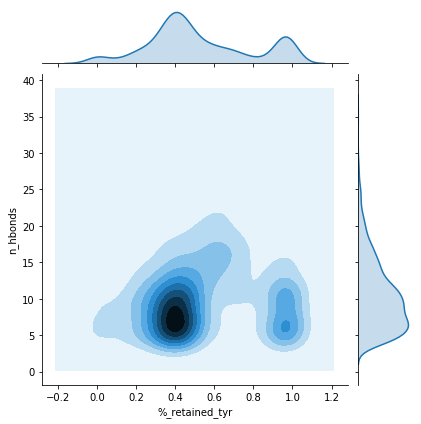

In [22]:
sns.jointplot("%_retained_tyr", "n_hbonds", dnetworks, kind='kde')

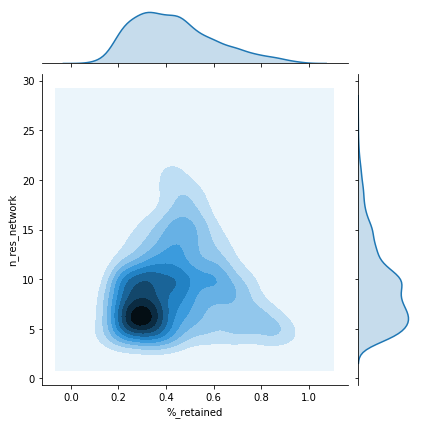

In [23]:
sns.jointplot("%_retained", "n_res_network", dnetworks, kind='kde')

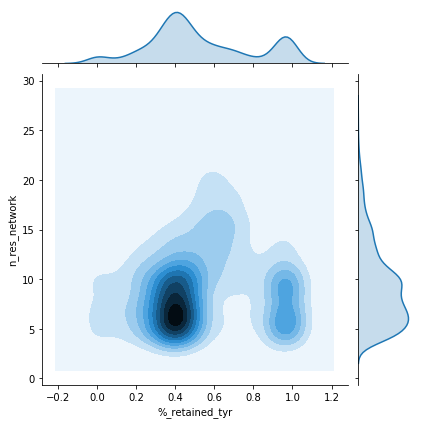

In [24]:
sns.jointplot("%_retained_tyr", "n_res_network", dnetworks, kind='kde')

In [29]:
dstable = dnetworks.loc[(dnetworks["%_retained_tyr"] >= 0.6)&(dnetworks["n_res_network"] >= 5)&(dnetworks["n_hbonds"] >= 4)&(dnetworks["%_retained"] >= 0.35)]
dstable.shape

(752, 6)

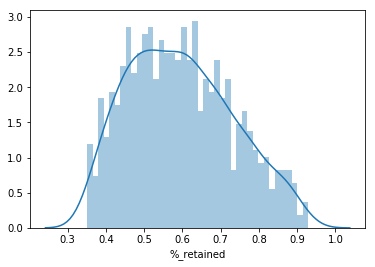

In [30]:
sns.distplot(dstable["%_retained"], bins=40)

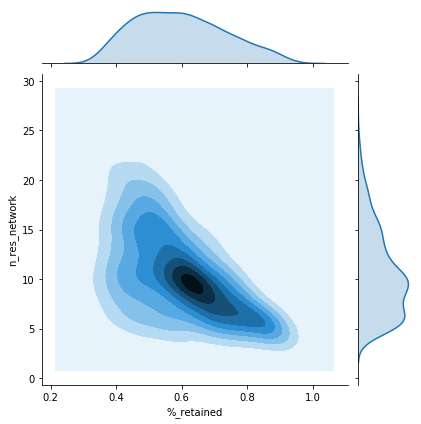

In [31]:
sns.jointplot("%_retained", "n_res_network", dstable, kind='kde')

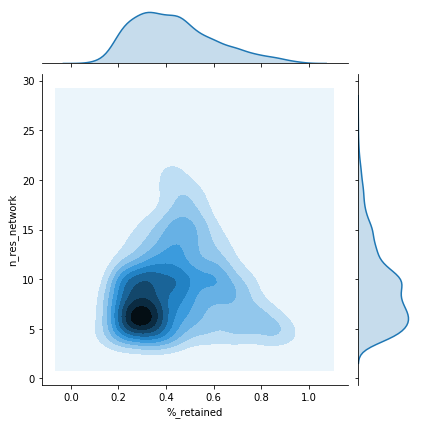

In [32]:
sns.jointplot("%_retained", "n_res_network", dnetworks, kind='kde')

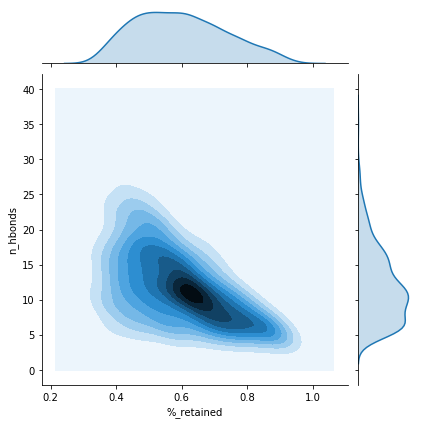

In [33]:
sns.jointplot("%_retained", "n_hbonds", dstable, kind='kde')

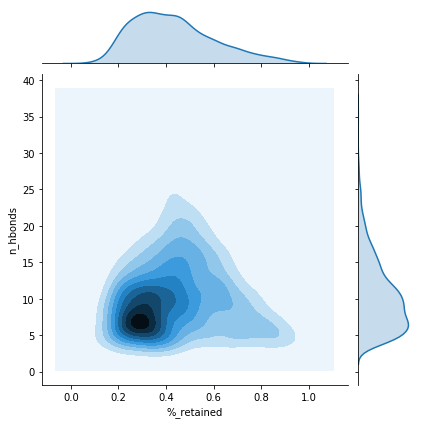

In [34]:
sns.jointplot("%_retained", "n_hbonds", dnetworks, kind='kde')

In [35]:
dstable.sort_values(by=['%_retained_tyr'])

,%_retained,%_retained_tyr,tyrs,n_res_network,n_hbonds,network_cst
description,,,,,,
106_input_0024_0004_8_0001_0001_0007,0.350856,0.600000,2.0,9.0,11.0,# 106_input_0024_0004_8_0001_0001_0007_0001_na...
109_input_0045_0002_7_0002_0009_0004,0.540311,0.601485,1.0,7.0,7.0,# 109_input_0045_0002_7_0002_0009_0004_0001_na...
15_input_0011_0005_7_0007_0004_0006,0.419636,0.601533,2.0,17.0,21.0,# 15_input_0011_0005_7_0007_0004_0006_0001_nat...
102_input_0030_0003_9_0003_0002_0005,0.501590,0.601781,2.0,14.0,16.0,# 102_input_0030_0003_9_0003_0002_0005_0001_na...
0_input_0093_0005_7_0008_0001_0006,0.517272,0.601874,2.0,16.0,16.0,# 0_input_0093_0005_7_0008_0001_0006_0001_nati...
24_input_0089_0005_10_0001_0004_0009,0.482316,0.602105,2.0,18.0,20.0,# 24_input_0089_0005_10_0001_0004_0009_0001_na...
0_input_0093_0005_7_0006_0004_0007,0.427173,0.602198,2.0,21.0,23.0,# 0_input_0093_0005_7_0006_0004_0007_0001_nati...
102_input_0030_0001_5_0010_0003_0008,0.465745,0.602861,2.0,13.0,16.0,# 102_input_0030_0001_5_0010_0003_0008_0001_na...
0_input_0093_0003_16_0008_0004,0.381400,0.603239,2.0,15.0,17.0,# 0_input_0093_0003_16_0008_0004_0001_native_n...


In [124]:
print(dstable.loc["100_input_0091_0001_2_0005_0010_0005"])

%_retained                                                 0.594215
%_retained_tyr                                             0.687374
tyrs                                                              3
n_res_network                                                    14
n_hbonds                                                         11
tyr38_n_res                                                       5
tyr38_n_hbond                                                     4
tyr94_n_res                                                       5
tyr94_n_hbond                                                     4
tyr150_n_res                                                      4
tyr150_n_hbond                                                    3
network_cst       # 100_input_0091_0001_2_0005_0010_0005_0001_na...
Name: 100_input_0091_0001_2_0005_0010_0005, dtype: object


In [36]:
picked_list = dstable.index.tolist()
#picked_names = df["description"].loc[picked_list].tolist()
dall_scores["design"] = dall_scores.description.apply(lambda x: "_".join(x.split("_")[:-1]))

dscore_picked = dall_scores.loc[dall_scores["design"].isin(picked_list)]
print(dscore_picked)

       SCORE:  total_score  angle_constraint  atom_pair_constraint  \
70     SCORE:    -1200.035               0.0                   0.0   
71     SCORE:    -1192.722               0.0                   0.0   
72     SCORE:    -1187.524               0.0                   0.0   
73     SCORE:    -1200.975               0.0                   0.0   
74     SCORE:    -1192.561               0.0                   0.0   
75     SCORE:    -1196.787               0.0                   0.0   
76     SCORE:    -1192.082               0.0                   0.0   
77     SCORE:    -1191.690               0.0                   0.0   
78     SCORE:    -1192.795               0.0                   0.0   
79     SCORE:    -1191.663               0.0                   0.0   
80     SCORE:    -1162.050               0.0                   0.0   
81     SCORE:    -1163.212               0.0                   0.0   
82     SCORE:    -1157.389               0.0                   0.0   
83     SCORE:    -11

In [38]:
dscore_picked[["omega","hbond_sc","hbond_lr_bb","rama_prepro","hbond_bb_sc"]].loc[dscore_picked["design"] == "100_input_0091_0001_2_0005_0010_0005"]

,omega,hbond_sc,hbond_lr_bb,rama_prepro,hbond_bb_sc


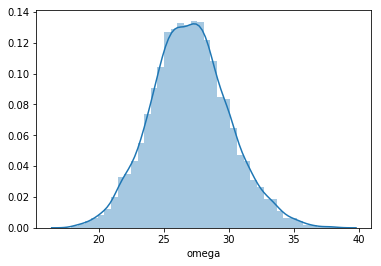

In [37]:
sns.distplot(dscore_picked["omega"], bins=40)

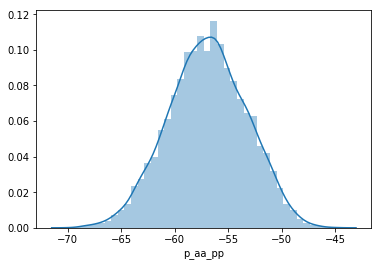

In [38]:
sns.distplot(dscore_picked["p_aa_pp"], bins=40)

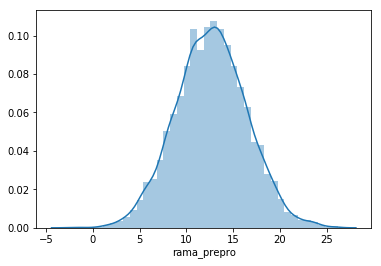

In [39]:
sns.distplot(dscore_picked["rama_prepro"], bins=40)

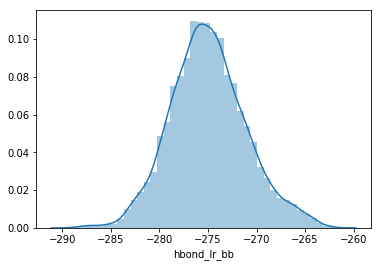

In [40]:
sns.distplot(dscore_picked["hbond_lr_bb"], bins=40)

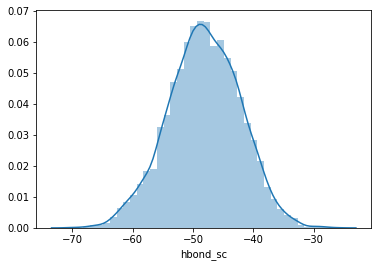

In [41]:
sns.distplot(dscore_picked["hbond_sc"], bins=40)

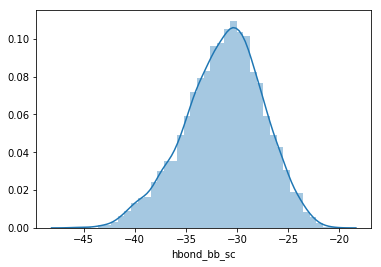

In [42]:
sns.distplot(dscore_picked["hbond_bb_sc"], bins=40)

In [43]:
#dpicked = dscore_picked.loc[(dscore_picked["hbond_sc"] < -34.0) & (dscore_picked["rama_prepro"] < 4) & (dscore_picked["hbond_lr_bb"] < -250) & (dscore_picked["hbond_bb_sc"] < -30)& (dscore_picked["omega"] < 23.6)]
dpicked = dscore_picked.loc[(dscore_picked["hbond_sc"] < -35.0) & (dscore_picked["rama_prepro"] < 15) & (dscore_picked["hbond_lr_bb"] < -268) & (dscore_picked["hbond_bb_sc"] < -25)& (dscore_picked["omega"] < 30)]
dpicked.shape

(4269, 26)

In [44]:
n = len(pd.unique(dpicked['design'])) 
print(n)

645


In [45]:
print(pd.unique(dpicked['design']))

['0_input_0093_0003_10_0010_0007_0007'
 '16_input_0002_0002_7_0009_0006_0002'
 '0_input_0093_0003_11_0003_0007_0003'
 '25_input_0002_0001_14_0001_0008_0010'
 '102_input_0030_0001_5_0010_0003_0008' '18_input_0082_0004_7_0002_0007'
 '10_input_0051_0002_9_0003_0002_0010' '106_input_0024_0004_7_0006_0005'
 '0_input_0042_0002_6_0008_0005_0003'
 '0_input_0093_0003_16_0006_0010_0001' '0_input_0093_0005_7_0008_0001'
 '10_input_0051_0002_12_0005_0009_0010'
 '108_input_0007_0003_5_0010_0006_0006'
 '109_input_0045_0002_9_0001_0002_0010'
 '16_input_0002_0005_6_0008_0007_0009'
 '0_input_0093_0003_16_0006_0010_0003'
 '15_input_0011_0005_13_0005_0001_0003'
 '10_input_0051_0002_8_0009_0009_0009'
 '0_input_0093_0005_10_0007_0008_0007'
 '0_input_0093_0003_8_0005_0007_0006'
 '24_input_0089_0003_14_0001_0004_0004'
 '103_input_0015_0003_5_0004_0003_0010'
 '16_input_0021_0001_21_0005_0009_0009'
 '10_input_0051_0002_17_0007_0009_0001'
 '0_input_0093_0003_8_0007_0001_0008'
 '103_input_0074_0002_11_0004_0005_0

In [46]:
dpicked.to_pickle('networks_selected_for_round4.pickle')

In [ ]:
dpicked = pd.read_pickle('networks_selected_for_round4.pickle')
print(dpicked)

In [48]:
dpicked.groupby(['design'], sort=False)['omega'].min()

design
0_input_0093_0003_10_0010_0007_0007      24.275
16_input_0002_0002_7_0009_0006_0002      24.786
0_input_0093_0003_11_0003_0007_0003      25.865
25_input_0002_0001_14_0001_0008_0010     26.168
102_input_0030_0001_5_0010_0003_0008     29.908
18_input_0082_0004_7_0002_0007           27.623
10_input_0051_0002_9_0003_0002_0010      17.877
106_input_0024_0004_7_0006_0005          28.257
0_input_0042_0002_6_0008_0005_0003       23.813
0_input_0093_0003_16_0006_0010_0001      27.585
0_input_0093_0005_7_0008_0001            24.613
10_input_0051_0002_12_0005_0009_0010     25.469
108_input_0007_0003_5_0010_0006_0006     25.171
109_input_0045_0002_9_0001_0002_0010     23.575
16_input_0002_0005_6_0008_0007_0009      22.378
0_input_0093_0003_16_0006_0010_0003      25.273
15_input_0011_0005_13_0005_0001_0003     23.147
10_input_0051_0002_8_0009_0009_0009      29.014
0_input_0093_0005_10_0007_0008_0007      25.698
0_input_0093_0003_8_0005_0007_0006       25.370
24_input_0089_0003_14_0001_0004_0

In [49]:
idx = dpicked.groupby(['design'])['omega'].transform(min) == dpicked['omega']
df1 = dpicked[idx]
print(df1)

       SCORE:  total_score  angle_constraint  atom_pair_constraint  \
74     SCORE:    -1192.561               0.0                   0.0   
86     SCORE:    -1164.915               0.0                   0.0   
177    SCORE:    -1181.366               0.0                   0.0   
197    SCORE:    -1180.258               0.0                   0.0   
231    SCORE:    -1174.140               0.0                   0.0   
245    SCORE:    -1168.850               0.0                   0.0   
385    SCORE:    -1180.113               0.0                   0.0   
420    SCORE:    -1180.614               0.0                   0.0   
431    SCORE:    -1176.029               0.0                   0.0   
546    SCORE:    -1171.926               0.0                   0.0   
586    SCORE:    -1150.375               0.0                   0.0   
634    SCORE:    -1169.232               0.0                   0.0   
644    SCORE:    -1170.221               0.0                   0.0   
662    SCORE:    -12

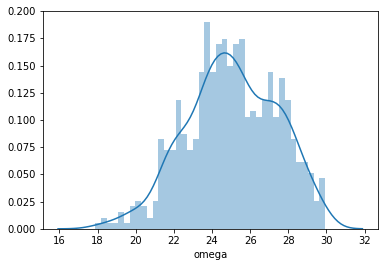

In [50]:
sns.distplot(df1["omega"], bins=40)

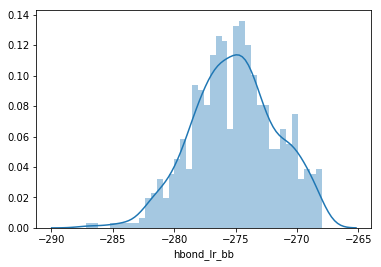

In [51]:
sns.distplot(df1["hbond_lr_bb"], bins=40)

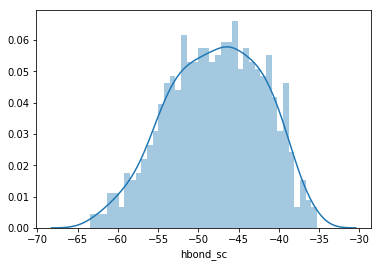

In [52]:
sns.distplot(df1["hbond_sc"], bins=40)

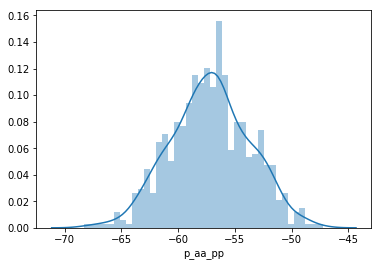

In [53]:
sns.distplot(df1["p_aa_pp"], bins=40)

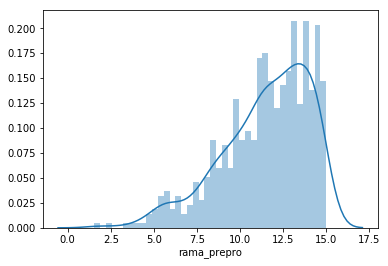

In [54]:
sns.distplot(df1["rama_prepro"], bins=40)

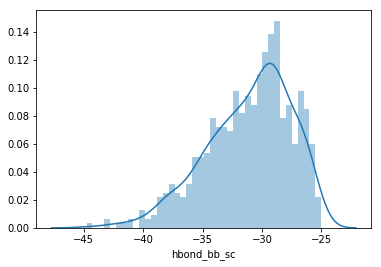

In [55]:
sns.distplot(df1["hbond_bb_sc"], bins=40)

In [56]:
from shutil import copyfile

for index,row in df1.iterrows():
    pdb = row['description'] + ".pdb"
    source = row['design'] + '/' + pdb
    target = "../round4_surf_B/" + pdb
    copyfile(source, target)